# Preparing data
1. Loading data
1. Impute missing values
2. Rescaling/transforming data
3. Feature engineering

## Loading Data

### Sklearn datasets

The `sklearn.datasets` package embeds some small sample [datasets](https://scikit-learn.org/stable/datasets.html)

For each dataset, there are 4 varibles:

- **data**: numpy array of predictors/X
- **target**: numpy array of predictant/target/y
- **feature_names**: names of all predictors in X
- **target_names**: names of all predictand in y

For example:

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
print(data.data[:5])
print(data.target[:5])
print(data.feature_names)
print(data.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Pandas

In [2]:
import pandas as pd
data_df = pd.DataFrame(pd.read_csv('/zfs/citi/workshop_data/python_ml/r_airquality.csv'))
data_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## Impute missing values

- There are several ways to treat the missing values:
- Method 1: remove all missing `NA` values

In [3]:
data1 = data_df.dropna()
data1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


- Method 2: Set `NA` to mean value 

In [4]:
data2 = data_df.copy()
data2.fillna(data2.mean(), inplace=True)
data2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


- Method 3: Use `Impute` to handle missing values

In statistics, imputation is the process of replacing missing data with substituted values. 
Because missing data can create problems for analyzing data, imputation is seen as a way to 
avoid pitfalls involved with listwise deletion of cases that have missing values. That is to 
say, when one or more values are missing for a case, most statistical packages default to discarding 
any case that has a missing value, which may introduce bias or affect the representativeness of the 
results. Imputation preserves all cases by replacing missing data with an estimated value based on 
other available information. Once all missing values have been imputed, the data set can then be 
analysed using standard techniques for complete data. There have been many theories embraced by 
scientists to account for missing data but the majority of them introduce bias. A few of the well 
known attempts to deal with missing data include: 
- hot deck and cold deck imputation; 
- listwise and pairwise deletion; 
- mean imputation; 
- non-negative matrix factorization; 
- regression imputation; 
- last observation carried forward; 
- stochastic imputation; 
- and multiple imputation.

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data3 = pd.DataFrame(imputer.fit_transform(data_df))
data3.columns = data_df.columns
data3.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0


**Note:**
SimpleImputer converts missing values to **mean, median, most_frequent and constant**.

---

**Question**: How do we decide the right imputation strategy? 

---

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data4 = pd.DataFrame(imputer.fit_transform(data_df))
data4.columns = data_df.columns
data4.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,31.5,205.0,14.3,56.0,5.0,5.0


`knnImpute` can also be used to fill in missing value

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_knnimpute = pd.DataFrame(imputer.fit_transform(data_df))
data_knnimpute.head()

,0,1,2,3,4,5
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,18.5,206.0,14.3,56.0,5.0,5.0


- In addition to KNNImputer, there are **IterativeImputer** (Multivariate imputer that estimates each feature from all the others) and **MissingIndicator**(Binary indicators for missing values)
- More information on sklearn.impute can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)

## Standardizing data
![image](https://user-images.githubusercontent.com/43855029/114231774-df6ba180-9948-11eb-9c61-3d2e0d3df889.png)

- Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units for example: rainfall (0-1000mm), temperature (-10 to 40oC), humidity (0-100%), etc.
- Standardition Convert all independent variables into the same scale (mean=0, std=1) 
- These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.
- The example below use data from above:

In [8]:
from sklearn.preprocessing import scale
data_std = pd.DataFrame(scale(data3, axis=0, with_mean=True, with_std=True))
data_std.columns = data3.columns
data_std.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,-0.039487,0.046406,-0.728332,-1.153490,-1.411916,-1.675504
1,-0.214316,-0.774834,-0.557464,-0.623508,-1.411916,-1.562324
2,-1.053493,-0.421245,0.752529,-0.411515,-1.411916,-1.449144
3,-0.843698,1.449357,0.439270,-1.683472,-1.411916,-1.335965
4,0.000000,0.000000,1.236657,-2.319450,-1.411916,-1.222785


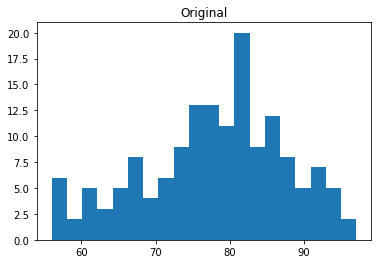

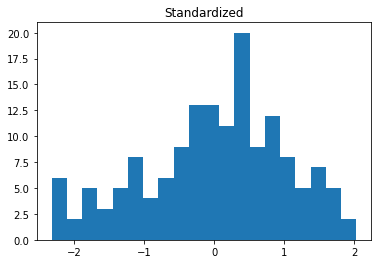

In [9]:
import matplotlib.pyplot as plt
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_std['Temp'], bins=20)
plt.title("Standardized")
plt.show()

#### 2.3.2.2 Using scaling with predefine range
Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
Formulation for this is:

```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaler = pd.DataFrame(scaler.fit_transform(data3), columns = data3.columns)
data_scaler.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.239521,0.559633,0.300000,0.268293,0.0,0.000000
1,0.209581,0.339450,0.331579,0.390244,0.0,0.033333
2,0.065868,0.434251,0.573684,0.439024,0.0,0.066667
3,0.101796,0.935780,0.515789,0.146341,0.0,0.100000
4,0.246283,0.547191,0.663158,0.000000,0.0,0.133333


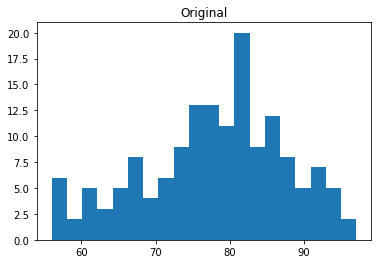

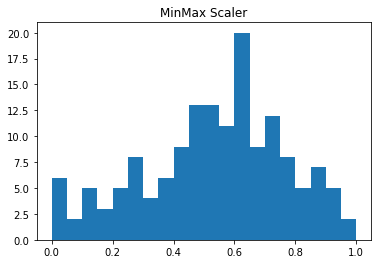

In [11]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_scaler['Temp'], bins=20)
plt.title("MinMax Scaler")
plt.show()

#### 2.3.2.3 Using Box-Cox Transformation
- A [Box Cox](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.2517-6161.1964.tb00553.x) transformation is a transformation of a non-normal dependent variables into a normal shape. 
- Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
- The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique.
- BoxCox can only be applied to stricly positive values

In [12]:
from sklearn.preprocessing import power_transform
data_BxCx = pd.DataFrame(power_transform(data3,method="box-cox"), columns = data3.columns)
data_BxCx.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.190792,0.029277,-0.696409,-1.155384,-1.441568,-1.940899
1,0.002915,-0.793127,-0.513633,-0.682490,-1.441568,-1.732923
2,-1.313959,-0.442026,0.772939,-0.481905,-1.441568,-1.553227
3,-0.879530,1.477677,0.480592,-1.587927,-1.441568,-1.389739
4,0.231016,-0.017799,1.209918,-2.054572,-1.441568,-1.237337


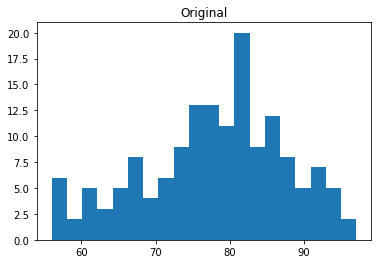

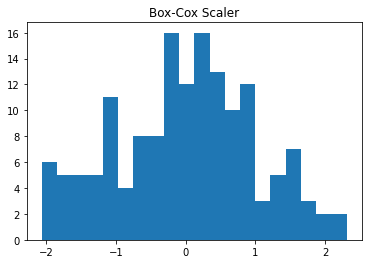

In [13]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_BxCx['Temp'], bins=20)
plt.title("Box-Cox Scaler")
plt.show()

#### 2.3.2.4 Using Yeo Johnson Transformation
While BoxCox only works with positive value, a more recent transformation method [Yeo Johnson](https://www.jstor.org/stable/2673623) can transform both positive and negative values.

In [14]:
data_yeo_johnson = pd.DataFrame(power_transform(data3,method="yeo-johnson"))
data_yeo_johnson.columns = data3.columns
data_yeo_johnson.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.196715,0.027324,-0.697609,-1.155302,-1.437509,-1.891431
1,0.007778,-0.795065,-0.514183,-0.682500,-1.437509,-1.709416
2,-1.326287,-0.444316,0.774562,-0.481950,-1.437509,-1.543376
3,-0.885431,1.480886,0.482270,-1.587780,-1.437509,-1.388286
4,0.237096,-0.019823,1.210699,-2.054440,-1.437509,-1.241399


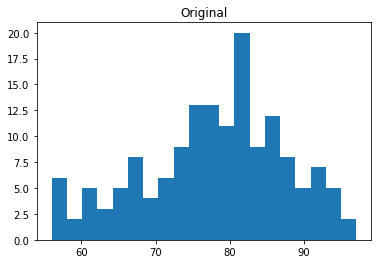

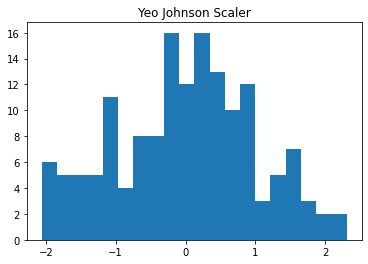

In [15]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_yeo_johnson['Temp'], bins=20)
plt.title("Yeo Johnson Scaler")
plt.show()

## Feature engineering / selection

Transform the data to facilitate learning. Many techniques, and we will only scratch the surface: 
* Manual feature engineering
* SelectKBest
* PCA
* One-Hot Encoder

In [16]:
data3.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0


In [17]:
X, y = data3.iloc[:,1:], data3.iloc[:,0]
X.shape, y.shape

((153, 5), (153,))

### Manual Feature Engineering

In [18]:
# Let's add a NEW feature - a ratio of two of the  measurements
X['Solar.R / Temp'] = X['Solar.R'] / X['Temp']
X

,Solar.R,Wind,Temp,Month,Day,Solar.R / Temp
0,190.000000,7.4,67.0,5.0,1.0,2.835821
1,118.000000,8.0,72.0,5.0,2.0,1.638889
2,149.000000,12.6,74.0,5.0,3.0,2.013514
3,313.000000,11.5,62.0,5.0,4.0,5.048387
4,185.931507,14.3,56.0,5.0,5.0,3.320205
...,...,...,...,...,...,...
148,193.000000,6.9,70.0,9.0,26.0,2.757143
149,145.000000,13.2,77.0,9.0,27.0,1.883117
150,191.000000,14.3,75.0,9.0,28.0,2.546667
151,131.000000,8.0,76.0,9.0,29.0,1.723684


### [Feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) 

In [19]:
# SelectKBest for selecting top-scoring features
from sklearn.feature_selection import SelectKBest, f_regression

# select the best 3 features for regression
dim_red = SelectKBest(f_regression, k = 2)
dim_red.fit(X, y)
X_t = dim_red.transform(X)

# Get back the selected columns
selected = dim_red.get_support() # boolean values
selected_names = X.columns[selected]

print('Top k features: ', list(selected_names))

Top k features:  ['Wind', 'Temp']


In [20]:
# Show scores, features selected and new shape
print('Scores:', dim_red.scores_)
print('New shape:', X_t.shape)

Scores: [1.52612031e+01 5.92750302e+01 8.88983834e+01 3.43229390e+00
 1.94731074e-02 3.35729306e+00]
New shape: (153, 2)


**Note on scoring function selection in `SelectKBest` tranformations:**
* For regression - [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* For classification - [chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)


### Principal component analysis (aka PCA)
* Reduces dimensions (number of features), based on what information explains the most variance (or signal)
* Considered unsupervised learning
* Useful for very large feature space (e.g. say the botanist in charge of the iris dataset measured 100 more parts of the flower and thus there were 104 columns instead of 4)
* More about PCA on wikipedia [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

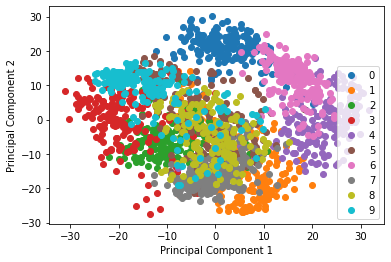

In [21]:
# PCA for dimensionality reduction

from sklearn import decomposition
from sklearn import datasets

digits = datasets.load_digits()

X, y = digits.data, digits.target

# perform principal component analysis
pca = decomposition.PCA(.95)
pca.fit(X)
X_t = pca.transform(X)
(X_t[:, 0])

# import numpy and matplotlib for plotting (and set some stuff)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

# let's separate out data based on first two principle components
x1, x2 = X_t[:, 0], X_t[:, 1]


# please don't worry about details of the plotting below 
c1 = np.array(list('rbg')) # colors
classes = digits.target_names[y] 
for (i, cla) in enumerate(set(classes)):
    xc = [p for (j, p) in enumerate(x1) if classes[j] == cla]
    yc = [p for (j, p) in enumerate(x2) if classes[j] == cla]
    plt.scatter(xc, yc, label = cla)
    plt.ylabel('Principal Component 2')
    plt.xlabel('Principal Component 1')
plt.legend(loc = 4)

See scikit-learn's excellent tutorial on feature selection [here](http://scikit-learn.org/stable/modules/feature_selection.html)

### One Hot Encoding
* It's an operation on feature labels - a method of dummying variable
* Expands the feature space by nature of transform - later this can be processed further with a dimensionality reduction (the dummied variables are now their own features)
* FYI:  One hot encoding variables is needed for python ML module `tenorflow`
* Can do this with `pandas` method or a `sklearn` one-hot-encoder system

#### `pandas` method

In [22]:
# Dummy variables with pandas built-in function

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Convert to dataframe and add a column with actual iris species name
data = pd.DataFrame(X, columns = iris.feature_names)
data['target_name'] = iris.target_names[y]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
df = pd.get_dummies(data, prefix = ['target_name'])
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name_setosa,target_name_versicolor,target_name_virginica
121,5.6,2.8,4.9,2.0,0,0,1
75,6.6,3.0,4.4,1.4,0,1,0
84,5.4,3.0,4.5,1.5,0,1,0
19,5.1,3.8,1.5,0.3,1,0,0
92,5.8,2.6,4.0,1.2,0,1,0
18,5.7,3.8,1.7,0.3,1,0,0
106,4.9,2.5,4.5,1.7,0,0,1
34,4.9,3.1,1.5,0.2,1,0,0
100,6.3,3.3,6.0,2.5,0,0,1
50,7.0,3.2,4.7,1.4,0,1,0


#### `sklearn` method

In [24]:
# OneHotEncoder for dummying variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# We encode both our categorical variable and it's labels
enc = OneHotEncoder()
label_enc = LabelEncoder() # remember the labels here

# Encode labels (can use for discrete numerical values as well)
data_label_encoded = label_enc.fit_transform(y)
data_label_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# Encode and "dummy" variables
data_feature_one_hot_encoded = enc.fit_transform(y.reshape(-1, 1))
print(data_feature_one_hot_encoded.shape)

num_dummies = data_feature_one_hot_encoded.shape[1]
df = pd.DataFrame(data_feature_one_hot_encoded.toarray(), columns = label_enc.inverse_transform(range(num_dummies)))

df.head()

(150, 3)


,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
